In [5]:
# Imports
import csv
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.interpolate import interp1d

In [36]:
# Defining Known Variables
N_A = 6.0221408*10**(23)  #atoms/mole
A = 112*0.0097+114*0.0065+115*0.0034+116*0.1454+117*0.0768+118*0.2422+119*0.0858+120*0.3259+122*0.0463+124*0.0579
mu = 3.10
Ci = 3.7*10**10  #Ci to Bq conversion

In [6]:
### Read XS Data
xs_file = '/Users/briannaryan/Desktop/CEvNS/Detector Material Comparison/tin_xs.csv'
energies_xs = []
xs = []

with open(xs_file) as file:
    reader = csv.reader(file)
    next(reader)
    for row in reader :
        energies_xs.append(float(row[0]))
        xs.append(float(row[1]))
        
xs_i = interp1d(energies_xs, xs)

In [2]:
### Reading Provided Data

In [20]:
# Read Data File Function

def get_avg_xs(spec_file, xs_i) :
    
    energies = []
    counts = []
    
    with open(spec_file) as file:
        reader = csv.reader(file)
        next(reader)
        for row in reader :
            energies.append(float(row[0])*10**3)
            counts.append(float(row[1]))
            
    counts_i = interp1d(energies, counts)
    
    avg = []
    weights = []
    for e in energies[8:]:
        avg.append(xs_i(e)*counts_i(e))
        weights.append(counts_i(e))

    avg_xs = sum(avg)/sum(weights)
    
    return avg_xs
    
def results(avg_xs) :
    
    constant_term = (4*math.pi*mu*A)/(avg_xs*10**(-4)*N_A*1000000)
    
    # Now lets break it down! Starting with r=1m
    M_s = range(1, 1000000000000, 1000000)  # Mega to Peta

    r1 = 1
    M_dec_r1 = []
    for m in M_s:
        M_dec_r1.append(constant_term*r1**2/(m*60*1000000))

    r4 = 5
    M_dec_r4 = []
    for m in M_s:
        M_dec_r4.append(constant_term*r4**2/(m*60*1000000))

    r5 = 10
    M_dec_r5 = []
    for m in M_s:
        M_dec_r5.append(constant_term*r5**2/(m*60*1000000))
        
    M_s_new = []
    for m in M_s :
        M_s_new.append(m*10**6)

    return M_s_new, M_dec_r1, M_dec_r4, M_dec_r5

In [41]:
cs_xs = get_avg_xs('Cs-137 Work/cs-137_spectrum.csv', xs_i)
cs_x, cs_1, cs_2, cs_3 = results(cs_xs)
cs_case1 = 2.667*10**17
cs_case2 = 1.607*10**15

In [42]:
ir_xs = get_avg_xs('Ir-192 Work/Ir-192_beta+ec.csv', xs_i)
ir_x, ir_1, ir_2, ir_3 = results(ir_xs)
ir_case1 = 159 * Ci
ir_case2 = 108 * Ci

In [43]:
cd_Q = 128000
cd_xs = xs_i(cd_Q)
cd_x, cd_1, cd_2, cd_3 = results(cd_xs)
cd_case1 = 1480*10**6
cd_case2 = 1240*10**6

In [44]:
co_xs = 1.42*10**(-41)
co_x, co_1, co_2, co_3 = results(co_xs)
co_case1 = 348*10**6
co_case2 = 12*10**(-3)*Ci

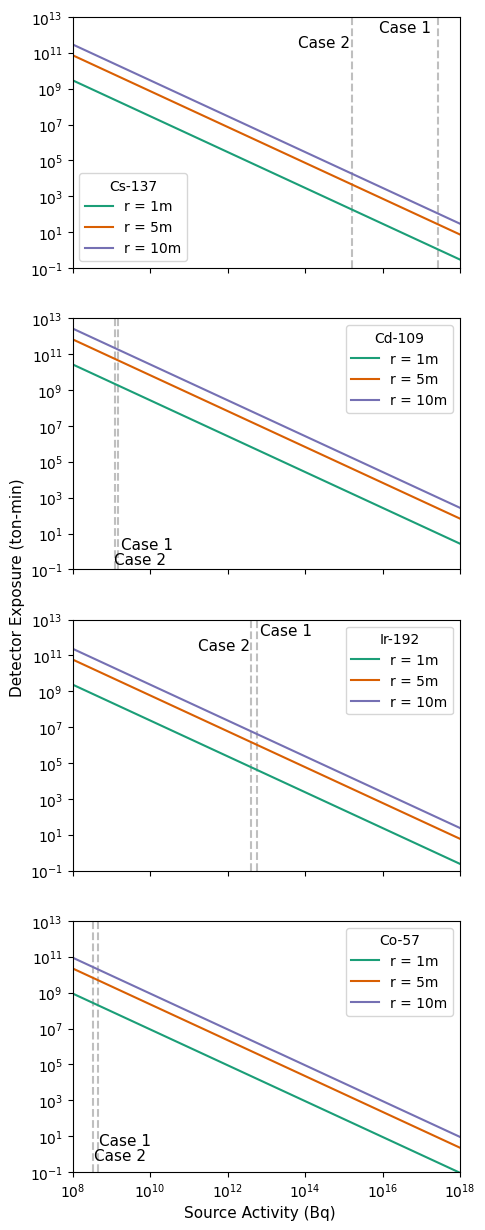

In [68]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, sharex=True, sharey=True)
fig.set_size_inches(5, 15)

ax1.set_xlim(10**8, 10**18)
ax1.set_ylim(10**(-1), 10**13)
ax1.axvline(x=cs_case1, color='grey', ls='dashed', alpha=0.5)
ax1.axvline(x=cs_case2, color='grey', ls='dashed', alpha=0.5)
ax1.plot(cs_x, cs_1, color='#1b9e77', label='r = 1m')
ax1.plot(cs_x, cs_2, color='#d95f02', label='r = 5m')
ax1.plot(cs_x, cs_3, color='#7570b3', label='r = 10m')
ax1.legend(title='Cs-137')
ax1.set_xscale('log')
ax1.set_yscale('log')
fig.text(0.79, 0.87, 'Case 1', ha='center', fontsize=11)
fig.text(0.629, 0.86, 'Case 2', ha='center', fontsize=11)

ax2.set_xlim(10**8, 10**18)
ax2.set_ylim(10**(-1), 10**13)
ax2.axvline(x=cd_case1, color='grey', ls='dashed', alpha=0.5)
ax2.axvline(x=cd_case2, color='grey', ls='dashed', alpha=0.5)
ax2.plot(cd_x, cd_1, color='#1b9e77', label='r = 1m')
ax2.plot(cd_x, cd_2, color='#d95f02', label='r = 5m')
ax2.plot(cd_x, cd_3, color='#7570b3', label='r = 10m')
ax2.legend(title='Cd-109')
ax2.set_xscale('log')
ax2.set_yscale('log')
fig.text(0.274, 0.525, 'Case 1', ha='center', fontsize=11)
fig.text(0.26, 0.515, 'Case 2', ha='center', fontsize=11)


ax3.set_xlim(10**8, 10**18)
ax3.set_ylim(10**(-1), 10**13)
ax3.axvline(x=ir_case1, color='grey', ls='dashed', alpha=0.5)
ax3.axvline(x=ir_case2, color='grey', ls='dashed', alpha=0.5)
ax3.plot(ir_x, ir_1, color='#1b9e77', label='r = 1m')
ax3.plot(ir_x, ir_2, color='#d95f02', label='r = 5m')
ax3.plot(ir_x, ir_3, color='#7570b3', label='r = 10m')
ax3.legend(title='Ir-192')
ax3.set_xscale('log')
ax3.set_yscale('log')
fig.text(0.551, 0.468, 'Case 1', ha='center', fontsize=11)
fig.text(0.428, 0.458, 'Case 2', ha='center', fontsize=11)


ax4.set_xlim(10**8, 10**18)
ax4.set_ylim(10**(-1), 10**13)
ax4.axvline(x=co_case1, color='grey', ls='dashed', alpha=0.5)
ax4.axvline(x=co_case2, color='grey', ls='dashed', alpha=0.5)
ax4.plot(co_x, co_1, color='#1b9e77', label='r = 1m')
ax4.plot(co_x, co_2, color='#d95f02', label='r = 5m')
ax4.plot(co_x, co_3, color='#7570b3', label='r = 10m')
ax4.legend(title='Co-57')
ax4.set_xscale('log')
ax4.set_yscale('log')
fig.text(0.23, 0.128, 'Case 1', ha='center', fontsize=11)
fig.text(0.219, 0.118, 'Case 2', ha='center', fontsize=11)


fig.text(0.5, 0.08, 'Source Activity (Bq)', ha='center', fontsize=11)
fig.text(0.0, 0.5, 'Detector Exposure (ton-min)', va='center', rotation='vertical', fontsize=11)
plt.savefig('paper_results.pdf')